In [28]:
# Initial imports.
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import sqlite3

In [29]:
df = pd.read_excel('Feb_27_all_categories.xlsx')
df.head()

,Unnamed: 0,Coc,CoC Category,TotalBeds,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,CocYear,TotalHomeless,Unsheltered,Sheltered,Population,Unemployment
0,0,AK-500,Other Largely Urban CoC,1033,799,234,0,171,601,71,2019,AK-500 2019,1111,97,1014,288000,4.4
1,1,AK-500,Other Largely Urban CoC,1028,749,279,0,125,604,71,2018,AK-500 2018,1094,94,1000,290521,5.0
2,2,AK-500,Other Largely Urban CoC,1023,597,426,0,43,571,71,2017,AK-500 2017,1128,155,973,294338,5.4
3,3,AK-500,Other Largely Urban CoC,1007,553,454,0,55,434,97,2016,AK-500 2016,1105,240,865,297249,5.3
4,4,AK-500,Other Largely Urban CoC,1019,603,416,0,28,492,71,2015,AK-500 2015,1208,179,1029,297547,4.9


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2199 non-null   int64  
 1   Coc                  2199 non-null   object 
 2   CoC Category         2199 non-null   object 
 3   TotalBeds            2199 non-null   int64  
 4   Emergency            2199 non-null   int64  
 5   Transitional         2199 non-null   int64  
 6   SafeHaven            2199 non-null   int64  
 7   RapidRehousing       2199 non-null   int64  
 8   PermanentSupportive  2199 non-null   int64  
 9   PermanentOther       2199 non-null   int64  
 10  Year                 2199 non-null   int64  
 11  CocYear              2199 non-null   object 
 12  TotalHomeless        2199 non-null   int64  
 13  Unsheltered          2199 non-null   int64  
 14  Sheltered            2199 non-null   int64  
 15  Population           2199 non-null   i

In [31]:
df2 = df.drop(['CoC Category', 'CocYear'], axis=1)

In [32]:
df2['Unsheltered_perc_tot'] = (df2['Unsheltered'] / df2['TotalHomeless']) *100

In [33]:
df2['TotalBeds_perc_tot'] = (df2['TotalBeds'] / df2['TotalHomeless']) *100

In [34]:
df2['Emergency_perc_tot'] = (df2['Emergency'] / df2['TotalHomeless']) *100

In [35]:
df2['Transitional_perc_tot'] = (df2['Transitional'] / df2['TotalHomeless']) *100

In [36]:
df2['SafeHaven_perc_tot'] = (df2['SafeHaven'] / df2['TotalHomeless']) *100

In [37]:
df2['PermanentSupportive_perc_tot'] = (df2['PermanentSupportive'] / df2['TotalHomeless']) *100

In [38]:
df2['PermanentOther_perc_tot'] = (df2['PermanentOther'] / df2['TotalHomeless']) *100

In [39]:
df2['RapidRehousing_perc_tot'] = (df2['RapidRehousing'] / df2['TotalHomeless']) *100

In [40]:
#df2['Awarded Amount_perc_tot'] = (df2['Awarded Amount'] / df2['TotalHomeless']) *100

In [41]:
df2.head()

,Unnamed: 0,Coc,TotalBeds,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,...,Population,Unemployment,Unsheltered_perc_tot,TotalBeds_perc_tot,Emergency_perc_tot,Transitional_perc_tot,SafeHaven_perc_tot,PermanentSupportive_perc_tot,PermanentOther_perc_tot,RapidRehousing_perc_tot
0,0,AK-500,1033,799,234,0,171,601,71,2019,...,288000,4.4,8.730873,92.979298,71.917192,21.062106,0.0,54.095410,6.390639,15.391539
1,1,AK-500,1028,749,279,0,125,604,71,2018,...,290521,5.0,8.592322,93.967093,68.464351,25.502742,0.0,55.210238,6.489945,11.425960
2,2,AK-500,1023,597,426,0,43,571,71,2017,...,294338,5.4,13.741135,90.691489,52.925532,37.765957,0.0,50.620567,6.294326,3.812057
3,3,AK-500,1007,553,454,0,55,434,97,2016,...,297249,5.3,21.719457,91.131222,50.045249,41.085973,0.0,39.276018,8.778281,4.977376
4,4,AK-500,1019,603,416,0,28,492,71,2015,...,297547,4.9,14.817881,84.354305,49.917219,34.437086,0.0,40.728477,5.877483,2.317881


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2199 non-null   int64  
 1   Coc                           2199 non-null   object 
 2   TotalBeds                     2199 non-null   int64  
 3   Emergency                     2199 non-null   int64  
 4   Transitional                  2199 non-null   int64  
 5   SafeHaven                     2199 non-null   int64  
 6   RapidRehousing                2199 non-null   int64  
 7   PermanentSupportive           2199 non-null   int64  
 8   PermanentOther                2199 non-null   int64  
 9   Year                          2199 non-null   int64  
 10  TotalHomeless                 2199 non-null   int64  
 11  Unsheltered                   2199 non-null   int64  
 12  Sheltered                     2199 non-null   int64  
 13  Pop

In [43]:
df2.to_excel('AllCocTypes_wPercent_Total_Homeless.xlsx')

In [44]:
df3 = df2.drop(['Coc', 'Emergency', 'Transitional', 'SafeHaven', 'RapidRehousing', 'PermanentSupportive', 'PermanentOther', 'Unsheltered', 'Sheltered', 'TotalBeds', 'Unnamed: 0' ], axis=1)

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          2199 non-null   int64  
 1   TotalHomeless                 2199 non-null   int64  
 2   Population                    2199 non-null   int64  
 3   Unemployment                  2199 non-null   float64
 4   Unsheltered_perc_tot          2199 non-null   float64
 5   TotalBeds_perc_tot            2199 non-null   float64
 6   Emergency_perc_tot            2199 non-null   float64
 7   Transitional_perc_tot         2199 non-null   float64
 8   SafeHaven_perc_tot            2199 non-null   float64
 9   PermanentSupportive_perc_tot  2199 non-null   float64
 10  PermanentOther_perc_tot       2199 non-null   float64
 11  RapidRehousing_perc_tot       2199 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 206.3 KB


In [46]:
# Define the features set.
X = df3.copy()
X = X.drop("Unsheltered_perc_tot", axis=1)
X.head()

,Year,TotalHomeless,Population,Unemployment,TotalBeds_perc_tot,Emergency_perc_tot,Transitional_perc_tot,SafeHaven_perc_tot,PermanentSupportive_perc_tot,PermanentOther_perc_tot,RapidRehousing_perc_tot
0,2019,1111,288000,4.4,92.979298,71.917192,21.062106,0.0,54.095410,6.390639,15.391539
1,2018,1094,290521,5.0,93.967093,68.464351,25.502742,0.0,55.210238,6.489945,11.425960
2,2017,1128,294338,5.4,90.691489,52.925532,37.765957,0.0,50.620567,6.294326,3.812057
3,2016,1105,297249,5.3,91.131222,50.045249,41.085973,0.0,39.276018,8.778281,4.977376
4,2015,1208,297547,4.9,84.354305,49.917219,34.437086,0.0,40.728477,5.877483,2.317881


In [47]:
# Define the target set.
y = df3["Unsheltered_perc_tot"].ravel()
y[:5]

array([ 8.73087309,  8.59232176, 13.74113475, 21.71945701, 14.81788079])

In [48]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [49]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [50]:
reg_model = regr.fit(X, y)

In [51]:
importances = reg_model.feature_importances_
importances

array([0.00000000e+00, 4.34197794e-02, 2.89082978e-03, 4.22231544e-04,
       9.03216375e-01, 2.34493219e-02, 5.17816627e-03, 0.00000000e+00,
       2.14232964e-02, 0.00000000e+00, 0.00000000e+00])

In [52]:
# We can sort the features by their importance.
sorted(zip(reg_model.feature_importances_, X.columns), reverse=True)

[(0.9032163747264291, 'TotalBeds_perc_tot'),
 (0.04341977937150922, 'TotalHomeless'),
 (0.023449321900400635, 'Emergency_perc_tot'),
 (0.02142329641241058, 'PermanentSupportive_perc_tot'),
 (0.005178166268299511, 'Transitional_perc_tot'),
 (0.002890829777243305, 'Population'),
 (0.0004222315437077304, 'Unemployment'),
 (0.0, 'Year'),
 (0.0, 'SafeHaven_perc_tot'),
 (0.0, 'RapidRehousing_perc_tot'),
 (0.0, 'PermanentOther_perc_tot')]

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt

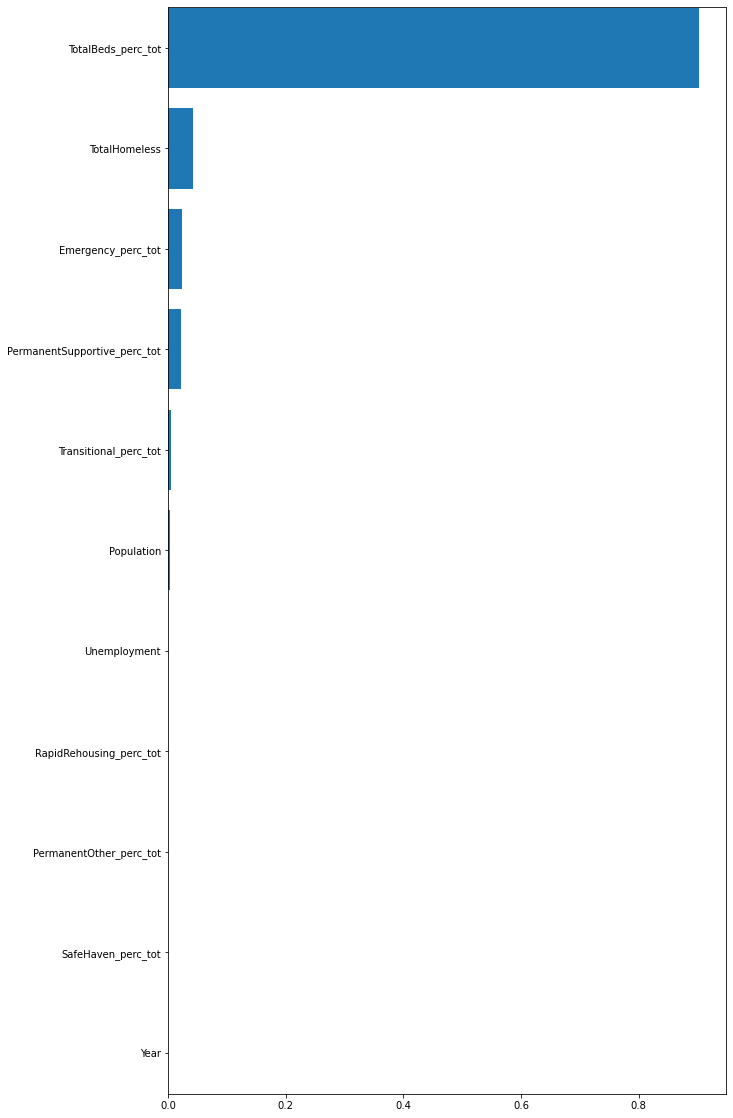

In [54]:
features = sorted(zip(X.columns, reg_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [55]:
estimator = reg_model.estimators_[5]

[Text(0.5, 0.875, 'X[4] <= 58.449\nsquared_error = 526.631\nsamples = 1393\nvalue = 26.591'),
 Text(0.25, 0.625, 'X[4] <= 36.36\nsquared_error = 495.376\nsamples = 331\nvalue = 54.955'),
 Text(0.125, 0.375, 'X[1] <= 232.0\nsquared_error = 442.435\nsamples = 121\nvalue = 69.739'),
 Text(0.0625, 0.125, 'squared_error = 0.513\nsamples = 6\nvalue = 2.11'),
 Text(0.1875, 0.125, 'squared_error = 210.875\nsamples = 115\nvalue = 73.319'),
 Text(0.375, 0.375, 'X[8] <= 81.709\nsquared_error = 356.848\nsamples = 210\nvalue = 47.522'),
 Text(0.3125, 0.125, 'squared_error = 301.243\nsamples = 170\nvalue = 50.604'),
 Text(0.4375, 0.125, 'squared_error = 365.738\nsamples = 40\nvalue = 33.186'),
 Text(0.75, 0.625, 'X[4] <= 80.945\nsquared_error = 194.842\nsamples = 1062\nvalue = 17.471'),
 Text(0.625, 0.375, 'X[8] <= 41.85\nsquared_error = 256.536\nsamples = 308\nvalue = 28.127'),
 Text(0.5625, 0.125, 'squared_error = 217.819\nsamples = 84\nvalue = 37.471'),
 Text(0.6875, 0.125, 'squared_error = 222.6

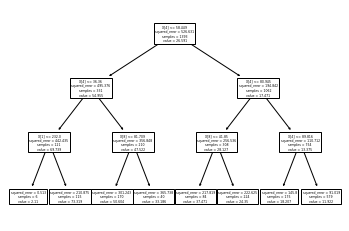

In [56]:
from sklearn import tree
tree.plot_tree(reg_model.estimators_[0])

In [97]:
#df2.to_excel('Percent_Total_Homeless.xlsx', index=False)

In [57]:
df3.to_excel('Percent_Total_Homeless_DroppedColumns_AllCoC.xlsx', index=False)